In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
classes = os.listdir('E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\train')
tclasses = os.listdir('E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\test')
print(tclasses)

['Apple leaf', 'Apple rust leaf', 'Apple Scab Leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'grape leaf', 'grape leaf black rot', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato Septoria leaf spot', 'Tomato two spotted spider mites leaf']


In [41]:
datagen = ImageDataGenerator(rescale=1./255)
gray_train_datagen = datagen.flow_from_directory('E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\gray_train',
                                            target_size = (128,128),
                                            batch_size = 64,
                                            class_mode = 'categorical')
gray_test_datagen = datagen.flow_from_directory('E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\gray_test',
                                            target_size = (128,128),
                                            batch_size = 64,
                                            class_mode = 'categorical')
train_datagen = datagen.flow_from_directory('E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\train',
                                            target_size = (128,128),
                                            batch_size = 64,
                                            class_mode = 'categorical')
test_datagen = datagen.flow_from_directory('E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\test',
                                            target_size = (128,128),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 1960 images belonging to 28 classes.
Found 227 images belonging to 28 classes.
Found 1960 images belonging to 28 classes.
Found 227 images belonging to 28 classes.


In [26]:
for c in classes:
    path = 'E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\train'
    dest_path = 'E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\gray_train'
    i = classes.index(c)
    path = os.path.join(path,c)
    dest_path = os.path.join(dest_path,c)
    os.makedirs(dest_path)
    for img in os.listdir(path):
        im = cv.imread(os.path.join(path,img))
        gray_im = cv.cvtColor(im, cv.COLOR_BGR2LAB)
        cv.imwrite(os.path.join(dest_path, img), gray_im)

In [27]:
for c in tclasses:
    path = 'E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\test'
    dest_path = 'E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\gray_test'
    i = classes.index(c)
    path = os.path.join(path,c)
    dest_path = os.path.join(dest_path,c)
    os.makedirs(dest_path)
    for img in os.listdir(path):
        im = cv.imread(os.path.join(path,img))
        gray_im = cv.cvtColor(im, cv.COLOR_BGR2LAB)
        cv.imwrite(os.path.join(dest_path, img), gray_im)

In [38]:
train_data = []
for c in classes:
    path = 'E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\train'
    i = classes.index(c)
    path = os.path.join(path,c)
    for img in os.listdir(path):
        im = cv.imread(os.path.join(path,img))
        if im is None:
           print("Image is empty: ", path)
           os.remove(os.path.join(path,img))
        else:
            im = cv.resize(im, (224, 224))
        train_data.append([im,i])

In [39]:
test_data = []
for c in tclasses:
    path = 'E:\\Plant Doc Disease Classification\\PlantDoc-Dataset-master\\test'
    i = tclasses.index(c)
    path = os.path.join(path,c)
    for img in os.listdir(path):
        im = cv.imread(os.path.join(path,img))
        if im is None:
           print("Image is empty: ", path)
           os.remove(os.path.join(path,img))
        else:
            im = cv.resize(im, (224, 224))
            print(im.shape)
        test_data.append([im,i])

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

In [41]:
train_data = np.array(train_data)
test_data = np.array(test_data)
#random.shuffle(train_data)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8312\50562481.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_data = np.array(test_data)


In [42]:
train_data.shape, test_data.shape

((2170, 2), (240, 2))

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,kernel_size= (3,3), strides= (1,1), activation = 'tanh', input_shape = (128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(32,kernel_size= (3,3), strides= (1,1), activation = 'tanh'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64,kernel_size= (3,3), strides= (1,1), activation = 'tanh'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128,kernel_size= (3,3), strides= (1,1), activation = 'tanh'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(256,kernel_size= (3,3), strides= (1,1), activation = 'tanh'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 64)     

In [46]:
mod = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size= (3,3), strides= (1,1), activation = 'relu', input_shape = (128,128,3)),
    tf.keras.layers.Conv2D(64,kernel_size= (3,3), strides= (1,1), activation = 'relu'),
    tf.keras.layers.Conv2D(128,kernel_size= (3,3), strides= (1,1), activation = 'tanh'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(classes), activation='softmax')
    
])

In [52]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size= (3,3), strides= (1,1), activation = 'relu', input_shape = (128,128,3)),
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Conv2D(16,kernel_size= (3,3), strides= (1,1), activation = 'relu'),
    tf.keras.layers.AveragePooling2D((2,2))
])
model1.summary()
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size= (3,3), strides= (1,1), activation = 'relu', input_shape = (128,128,3)),
    tf.keras.layers.AveragePooling2D((2,2)),
    tf.keras.layers.Conv2D(16,kernel_size= (3,3), strides= (1,1), activation = 'relu'),
    tf.keras.layers.AveragePooling2D((2,2))
])
merged = tf.keras.layers.Concatenate([model1,model2])
final = tf.keras.models.Sequential([
    merged,
    tf.keras.layers.Conv2D(64,kernel_size= (3,3), strides= (1,1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 average_pooling2d_8 (Averag  (None, 63, 63, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_48 (Conv2D)          (None, 61, 61, 16)        4624      
                                                                 
 average_pooling2d_9 (Averag  (None, 30, 30, 16)       0         
 ePooling2D)                                                     
                                                                 
Total params: 5,520
Trainable params: 5,520
Non-trainable params: 0
_________________________________________________________________


In [57]:
final.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics= ['accuracy'])

In [55]:
history = final.fit([train_datagen,gray_train_datagen], epochs=30, validation_data= [test_datagen,gray_test_datagen], verbose=1)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'keras.preprocessing.image.DirectoryIterator'>"}), <class 'NoneType'>

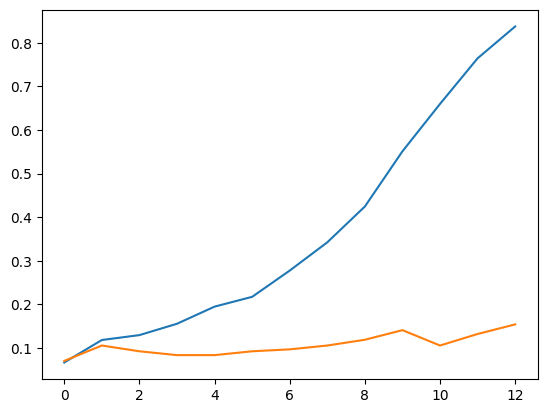

In [22]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

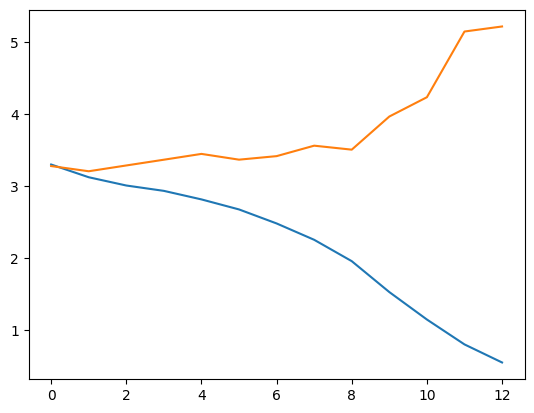

In [23]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [63]:
predictions = model.predict(test_datagen)

2/2 [==============================] - 6s 3s/step


In [64]:
np.argmax(predictions[0])
print(predictions[0], np.argmax(predictions[0]))

[1.6692380e-07 4.9481958e-01 2.2634943e-07 3.4391618e-14 4.0946752e-10
 5.7390707e-07 4.9452575e-10 8.8980919e-18 1.5003597e-10 8.7492213e-10
 6.6266284e-07 2.5226359e-07 1.1764760e-10 3.5698619e-01 2.3451641e-08
 2.7839931e-21 1.4763224e-01 4.0342143e-11 2.8885883e-11 2.0901931e-08
 4.8342940e-07 1.6974821e-11 2.2121496e-10 1.4111124e-09 4.9649163e-10
 3.4412844e-16 5.5952056e-04 5.9935883e-09] 1
